In [26]:
import pandas as pd
from PIL import Image
Image.MAX_IMAGE_PIXELS=None
import numpy as np
from skimage.morphology import closing, square, remove_small_objects, remove_small_holes
import os
import cv2
from matplotlib import pyplot as plt
from copy import deepcopy

In [27]:
#use collagen to define dermis
# 1. extract collagen(class=10) from DLmask
# 2. remove small object and fill holes in collagen to make it a single connected body
# 3. find epidermal-dermis junction using maximum of the binary in y-axis
# 4. remove any pixels that are not epidermis above the epidermal-dermis junction
# 5. iterate each class to replace any potentially wrong pixel to correct class
    #hair foliical:adj pixel look at window

In [305]:
#read deeplab crop
dlcropsrc = r'\\fatherserverdw\kyuex\datadst\20220929\dlcrop'

In [ ]:
#1. remove small object and fill holes in collagen to make it a single connected body
dl = Image.open(os.path.join(dlcropsrc, "2022-06-07 14.34.59sec1.png"))

In [309]:

dl_arr = np.array(dl)
col = (dl_arr == 10) #boolean

In [492]:
#2.remove small object and fill holes in collagen to make it a single connected body

minTA = 60000
minTAhole = 10000 #is this too much?

#resize to expedite
(width, height) = (dl.width // 10, dl.height // 10)
collagen = Image.fromarray(col).resize((width, height), resample=0)

collagen= closing(collagen, square(3))  # 13sec
collagen= remove_small_objects(collagen, min_size=minTA, connectivity=2)  # 6sec
collagen = remove_small_holes(collagen , area_threshold=minTAhole).astype(np.uint8)

kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(collagen .astype(np.uint8), cv2.MORPH_OPEN, kernel, iterations=2)  # 2sec
collagen = cv2.dilate(opening, kernel, iterations=3)

#resize back
collagen = Image.fromarray(collagen).resize((dl.width, dl.height),resample=0)
collagen_arr = np.array(collagen)

In [551]:
#3. find epidermal-dermis junction using maximum of the binary in y-axis3. find epidermal-dermis junction using maximum of the binary in y-axis
[xt,yt] = np.where(collagen_arr)


In [552]:
#we actually want to find the minimum x-coordinate (because this image is weirdly oriented)
unique_y = np.unique(yt)
tmp = collagen_arr[:,0:max(xt)]

In [567]:
max(xt)

9745

In [553]:

min_x = [np.amin(np.where(tmp[:,y])) for y in unique_y[unique_y < max(xt)]]

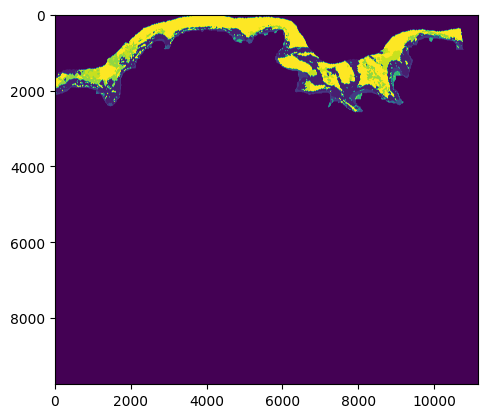

In [563]:
epi = deepcopy(dl_arr)
epi[collagen_arr == 1] = 0
epi[max(min_x):,] = 0
plt.imshow(epi)

In [558]:
#what to do with epi not 1 or 2


[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False

In [533]:

#x_unique= np.unique(xt)
#max_y = [np.amax(np.where(collagen_arr[x,:])) for y in x_unique]


ValueError: zero-size array to reduction operation maximum which has no identity

In [507]:
#generate new classification map
new_dl = np.zeros((dl.height,  dl.width))

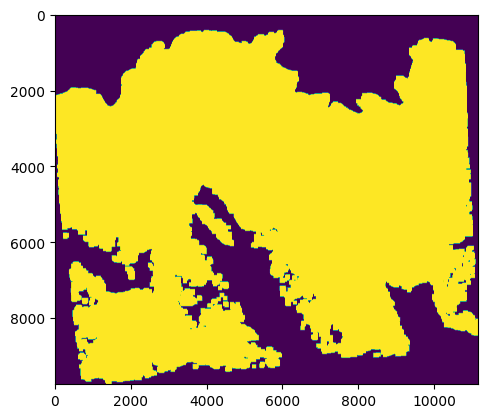

In [529]:
plt.imshow(collagen_arr)


In [ ]:
# 5. iterate each class to replace any potentially wrong pixel to correct class

In [107]:
dl_epi = dl_arr * bin_epi ########

array([1], dtype=uint8)